# <span style="color:green"><center>Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Pytorch</center></span>

<center>DataSets y DataLoaders</center>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Diseño gráfico y Marketing digital</span>
 

1. Maria del Pilar Montenegro Reyes, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

## <span style="color:blue">Referencias</span> 

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Pipeline de HuggingFace](#Pipeline-de-HuggingFace)

## <span style="color:blue">Introducción</span>

El código para procesar muestras de datos puede resultar complicado y difícil de mantener; idealmente queremos que nuestro código de datasets se desacople de nuestro código de entrenamiento modelo para una mejor legibilidad y modularidad. PyTorch proporciona dos primitivas de datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset` que le permiten utilizar conjuntos de datos precargados, así como sus propios datos. 

`Dataset` almacena las muestras y sus etiquetas correspondientes, y `DataLoader` envuelve un iterable alrededor del conjunto de datos para permitir un fácil acceso a las muestras.

## <span style="color:blue">Carga de un Dataset</span>

In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [6]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

## <span style="color:blue">Iterando y visualizando el dataset</span>

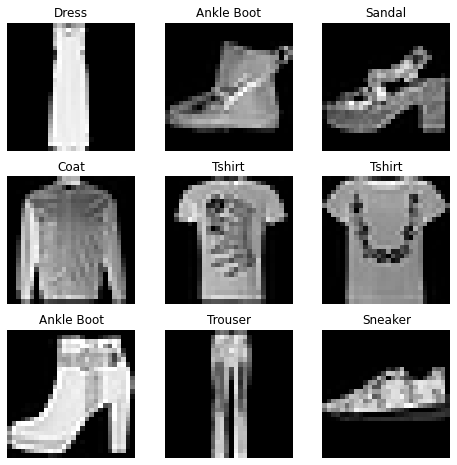

In [7]:
label_map = {
    0: 'Tshirt',
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",   
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size =(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## <span style="color:blue">Creación de un conjunto de datos personalizado para sus archivos</span>

En este ejemplo, las imágenes FashionMNIST se almacenan en un directorio img_dir, y sus etiquetas se almacenan por separado en un archivo CSV  `annotations_file`.


In [4]:
import os
import pandas as pda
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __get_item__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label =  self.image_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

las etiquetas (labels) del archivo *labels.csv*  lucen como

## <span style="color:blue">Preparando sus datos para entrenamiento con DataLoaders</span>

In [12]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


### Iterando a lo largo del DataLoader

Cada iteración retorna un batch (`batch_size=64`) de datos (`train_features` y `train_labels`). Dado que *shuffel=True* en el ejemplo, todos los lotes de datos se mezclan. Un control mpas fino para establecer el orden se obtiene usando `Samplers`.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


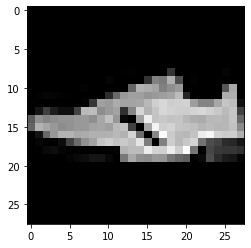

Label: 7


In [13]:
# Despliega imagen y etiqueta
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()# primer elemento del batch
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')